# Fraud detection

## Step1- Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import seaborn as sns
import sagemaker
from sklearn.model_selection import train_test_split
import boto3
import matplotlib.pyplot as plt

# Configurer la région
region = "ap-southeast-2"

# Création du client SageMaker
sm_boto3 = boto3.client("sagemaker", region_name=region)

# Initialisation de la session SageMaker
sess = sagemaker.Session(boto_session=boto3.Session(region_name=region))

# Bucket SageMaker
bucket = 'predictionbucketforsagemaker'  # Mentionnez le bucket SageMaker ici

# Sortie
print("Using Bucket: " + bucket)
print("Region: " + region)

c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\pydantic\_internal\_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[12/30/24 15:14:35] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=564920;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\botocore\credentials.py\credentials.py]8;;\:]8;id=117491;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\botocore\credentials.py#1278\1278]8;;\

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\home\AppData\Local\sagemaker\sagemaker\config.yaml


[12/30/24 15:14:48] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=889182;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\botocore\credentials.py\credentials.py]8;;\:]8;id=796317;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\botocore\credentials.py#1278\1278]8;;\

[12/30/24 15:14:49] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=815644;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\botocore\credentials.py\credentials.py]8;;\:]8;id=295931;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\botocore\credentials.py#1278\1278]8;;\

Using Bucket: predictionbucketforsagemaker
Region: ap-southeast-2


## Step2- Retrieve the Data

In [2]:
credit_card = pd.read_csv('creditcard.csv')

In [3]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step3- Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!



In [4]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

[12/29/24 10:25:42] INFO     Using categorical units to plot a list of strings that are all         ]8;id=608913;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\matplotlib\category.py\category.py]8;;\:]8;id=725293;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\matplotlib\category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=87849;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\matplotlib\category.py\category.py]8;;\:]8;id=643255;file://c:\Users\home\OneDrive\Bureau\prediction_fraud\myenv\Lib\site-packages\matplotlib\category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

<Axes: xlabel='Class', ylabel='count'>

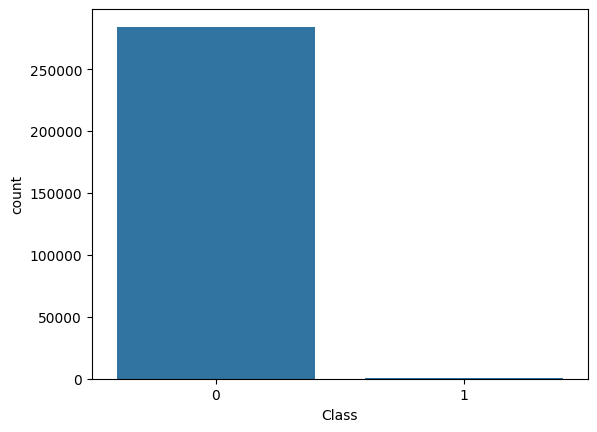

In [5]:
sns.countplot(x='Class', data=credit_card)

## Step4- Preparing the data into train and test 

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [6]:
X = credit_card.drop(columns='Class', axis=1) 
y = credit_card.Class.values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 5- Build a RandomForest model for classification

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=14,max_depth=11,bootstrap=False,random_state=101)

## Step 6- Train the model

In [12]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=11, n_estimators=14,
                       random_state=101)

## Step7- Evaluation

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



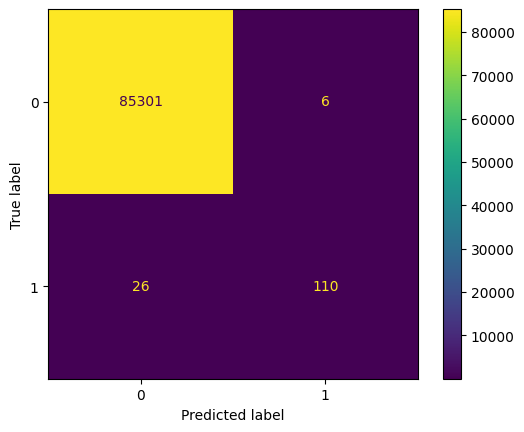

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [16]:
bucket

'predictionbucketforsagemaker'

In [17]:
# Mettre à jour le préfixe pour refléter la structure du compartiment
sk_prefix = "sagemaker/mobile_price_classification/sklearncontainer"

# Charger les données dans le bucket S3 au bon chemin
trainpath rd-train.csv", bucket=bucket, key_prefix=sk_prefix
)= sess.upload_data(
    path="creditca

testpath = sess.upload_data(
    path="creditcard.csv", bucket=bucket, key_prefix=sk_prefix
)

print(f"Training data uploaded to: {trainpath}")
print(f"Test data uploaded to: {testpath}")


╭──────────────────────────────────────────────────────────────────────────────────────────────────╮
│ trainpath rd-train.csv", bucket=bucket, key_prefix=sk_prefix                                     │
│                       ▲                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: unterminated string literal (detected at line 5)

In [18]:
%%writefile script.py

import argparse
import os
import numpy as np
import pandas as pd
import joblib
import boto3
import pathlib
from io import StringIO

# Correction: utiliser 'metrics' et non 'mectifs'
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier


def model_fn(model_dir):
    """
    Fonction utilisée par SageMaker au moment de l'inférence :
    elle doit charger et retourner le modèle depuis le répertoire
    où il a été sauvegardé (ici "model.joblib").
    """
    clf = joblib.load(os.path.join(model_dir, "model.joblib"))
    return clf


if __name__ == "__main__":

    print("[INFO] Extracting arguments")
    parser = argparse.ArgumentParser()

    # --- Hyperparamètres (adapter si besoin) ---
    parser.add_argument("--n_estimators", type=int, default=14)
    parser.add_argument("--max_depth", type=int, default=11)
    parser.add_argument("--bootstrap", type=bool, default=False)
    parser.add_argument("--random_state", type=int, default=101)

    # --- Chemins par défaut dans l'environnement SageMaker ---
    parser.add_argument("--model-dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--train", type=str, default=os.environ.get("SM_CHANNEL_TRAIN"))
    parser.add_argument("--test", type=str, default=os.environ.get("SM_CHANNEL_TEST"))
    parser.add_argument("--train-file", type=str, default="creditcard-train.csv")
    parser.add_argument("--test-file", type=str, default="creditcard.csv")

    args, _ = parser.parse_known_args()

    # Vérifications de versions (optionnelles)
    import sklearn
    print("SKlearn Version: ", sklearn.__version__)
    print("Joblib Version: ", joblib.__version__)

    print("[INFO] Reading data...")
    train_path = os.path.join(args.train, args.train_file)
    test_path = os.path.join(args.test, args.test_file)
    
    # Correction : "test_def" -> "test_df"
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Pour correspondre à votre code : la dernière colonne est la cible 'Class'
    features = list(train_df.columns)
    label = features.pop(-1)  # Retire la dernière colonne de la liste pour en faire la cible

    print("Building training and testing datasets...")
    X_train = train_df[features]
    y_train = train_df[label]
    X_test = test_df[features]
    y_test = test_df[label]

    print('Column order:')
    print(features)
    print()
    print("Label column is:", label)
    print()
    print("Data Shape:")
    print("--- SHAPE OF TRAINING DATA ---")
    print("X_train:", X_train.shape)
    print("y_train:", y_train.shape)
    print()
    print("--- SHAPE OF TESTING DATA ---")
    print("X_test :", X_test.shape)
    print("y_test :", y_test.shape)
    print()

    # Entraînement du RandomForest, avec les hyperparamètres passés
    print("[INFO] Training RandomForest Model...")
    model = RandomForestClassifier(
        n_estimators=args.n_estimators,
        max_depth=args.max_depth,
        bootstrap=args.bootstrap,
        random_state=args.random_state
    )
    model.fit(X_train, y_train)

    # Sauvegarde du modèle
    model_path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model, model_path)
    print(f"[INFO] Model persisted at {model_path}")
    print()

    # Évaluation sur le jeu de test
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_rep = classification_report(y_test, y_pred_test)

    print("----- METRICS ON TESTING DATA -----")
    print(f"Total rows in test set: {X_test.shape[0]}")
    print("[TESTING] Model accuracy:", test_acc)
    print("[TESTING] Classification Report:")
    print(test_rep)


Overwriting script.py


In [ ]:
from sagemaker.sklearn.estimator import SKLearn

# Spécifiez la version du framework Scikit-learn qui vous convient.
# Par exemple : "0.23-1" ou une version plus récente.
FRAMEWORK_VERSION = "0.23-1"

# Créez une session SageMaker avec la région spécifiée
sagemaker_session = sagemaker.Session(boto_session=boto3.Session(region_name=region))

# Définissez l'ARN du rôle SageMaker
role = "arn:aws:iam::703671908876:role/service-role/AmazonSageMaker-ExecutionRole-20241225T141954"  # Remplacez par votre ARN de rôle SageMaker

# Définissez les chemins S3 pour les données d'entraînement et de test
train_s3_path = f"s3://predictionbucketforsagemaker/sagemaker/mobile_price_classification/sklearncontainer/creditcard-train.csv"
test_s3_path = f"s3://predictionbucketforsagemaker/sagemaker/mobile_price_classification/sklearncontainer/creditcard.csv"

# Initialisez l'estimateur SKLearn avec la session SageMaker
sklearn_estimator = SKLearn(
    entry_point="script.py",                         # Le script d'entraînement
    role=role,                                       # Votre ARN de rôle SageMaker
    instance_count=1,                                # Nombre d'instances de calcul
    instance_type="ml.m5.large",                     # Type d'instance
    framework_version=FRAMEWORK_VERSION,
    base_job_name="RF-custom-sklearn",               # Nom de job, préfixé sur SageMaker
    hyperparameters={
        "n_estimators": 14,         # Aligné avec votre script
        "max_depth": 11,
        "bootstrap": False,
        "random_state": 101,
    },
    use_spot_instances=True,  # Pour utiliser des instances spot (réduction de coût)
    max_wait=7200,            # Temps d'attente max (en secondes) avant interruption
    max_run=3600,             # Temps d'exécution max (en secondes)
    sagemaker_session=sagemaker_session,  # Ajoutez la session SageMaker
)

# Lancez le job d'entraînement
sklearn_estimator.fit({
    "train": train_s3_path,
    "test": test_s3_path,
})

In [ ]:
# Lancer le job d'entraînement et attendre sa fin
sklearn_estimator.fit({"train": train_s3_path, "test": test_s3_path}, wait=True)


In [ ]:
sklearn_estimator.latest_training_job.wait(logs="None")
artifact = sm_boto3.describe_training_job(
  TrainingJobName=sklearn_estimator.latest_training_job.name
)["ModelArtifacts"]["S3ModelArtifacts"]

print("Model artifact persisted at " + artifact)

In [ ]:
artifact 

In [23]:
from sagemaker.sklearn.model import SKLearnModel 
from time import gmtime, strftime 

model_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
model = SKLearnModel(
  name = model_name,
  model_data=artifact,
  role="",
  entry_point="script.py",
  framework_version=FRAMEWORK_VERSION, 
)

In [ ]:
model

In [ ]:
from sagemaker.sklearn.model import SKLearnModel
from time import gmtime, strftime

# Générer un nom unique pour l'endpoint
endpoint_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("EndpointName={}".format(endpoint_name))

# Créer l'objet SKLearnModel avec la session SageMaker spécifiée
model = SKLearnModel(
    name="Custom-sklearn-model",
    model_data=artifact,  # Le chemin S3 du modèle sauvegardé
    role="arn:aws:iam::703671908876:role/service-role/AmazonSageMaker-ExecutionRole-20241225T141954",
    entry_point="script.py",
    framework_version=FRAMEWORK_VERSION,
    sagemaker_session=sagemaker_session,  # Ajout explicite de la session SageMaker
)

# Déployer le modèle
predictor = model.deploy(
    initial_instance_count=1,
    instance_type="ml.m4.xlarge",
    endpoint_name=endpoint_name,
)


In [ ]:
predictor

In [ ]:
endpoint_name

In [ ]:
import boto3

# Nom de votre endpoint SageMaker
endpoint_name = "Custom-sklearn-model-2024-12-29-06-56-05"  # <-- Remplacez par le vôtre

# Créer un client SageMaker Runtime
runtime_client = boto3.client('sagemaker-runtime', region_name='ap-southeast-2')

# Supposons que le modèle a été entraîné sur 30 colonnes, par ex. "Time", "V1", ..., "V28", "Amount".
# Vous devez *exactement* respecter l'ordre et le nombre de colonnes entraînées !
# Ci-dessous, c'est seulement un exemple:
test_rows = [
    [
        7526, 0.0084303648955825, 4.13783683497998, -6.24069657194744, 6.6757321631344,
        0.768307024571449, -3.35305954788994, -1.63173467271809, 0.15461244822474,
        -2.79589246446281, -6.18789062970647, 5.66439470857116, -9.85448482287037,
        -0.306166658250084, -10.6911962118171, -0.638498192673322, -2.04197379107768,
        -1.12905587703585, 0.116452521226364, -1.93466573889727, 0.488378221134715,
        0.36451420978479, -0.608057133838703, -0.539527941820093, 0.128939982991813,
        1.48848121006868, 0.50796267782385, 0.735821636119662, 0.513573740679437, 1
    ],
    [
        7535, 0.0267792264491516, 4.13246389713003, -6.56059996809658, 6.34855667313983,
        1.32966566904142, -2.51347884762413, -1.68910220031328, 0.303252800547589,
        -3.13940905736457, -6.04546779778801, 6.75462544809695, -8.94817857893317,
        0.702724998099873, -10.7338541032306, -1.37951985681718, -1.63896011485587,
        -1.74635013628103, 0.776744097926754, -1.32735663549015, 0.587743219006407,
        0.370508651493253, -0.57675247317433, -0.669605371766238, -0.759907529538618,
        1.60505555017462, 0.540675396428899, 0.737040381683977, 0.496699108168337, 1
    ],
    [
        7543, 0.329594333318222, 3.71288929524103, -1.77593510831666, 1.07826550560828,
        1.66735901311948, -2.42016841351562, -0.812891249491333, 1.133080117970748,
        -2.21431131204961, -5.13445447110633, 4.56072010550223, -2.87374836164535,
        -0.797483599628474, -9.17716637009146, -0.25702477514424, -3.871688490451564,
        1.31301362907797, 0.773913872552923, -2.37059945059811, 0.269772775978284,
        0.156617169389793, -0.652450440932299, -0.551572219392364, -0.716521635357197,
        1.41571661508922, 0.555264739787582, 0.530507388890912, 0.404474054528712, 85
    ]
]


# Convertir chaque ligne en CSV, et les séparer par des retours à la ligne
csv_payload = "\n".join(
    [",".join(str(x) for x in row) for row in test_rows]
)

try:
    # Appeler l'endpoint
    response = runtime_client.invoke_endpoint(
        EndpointName=endpoint_name,
        ContentType='text/csv',  # Important : on envoie du CSV
        Body=csv_payload
    )

    # Récupérer et décoder la réponse
    result = response['Body'].read().decode('utf-8')
    print("Predictions:", result)

except Exception as e:
    print("Erreur lors de l'invocation de l'endpoint:", str(e))


In [ ]:
# Nom du modèle
model_name = "sagemaker.sklearn.model.SKLearnModel at 0x195f342aa10"  # Remplacez par le nom de votre modèle

# Supprimer le modèle
try:
    sm_client.delete_model(ModelName=model_name)
    print(f"Le modèle '{model_name}' a été supprimé avec succès.")
except Exception as e:
    print(f"Erreur lors de la suppression du modèle : {e}")
